##Índice Bovespa Smart Low Volatility B3 (Ibov Smart Low Vol B3)
https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-segmentos-e-setoriais/indice-bovespa-smart-low-volatility-b3-ibov-smart-low-vol-b3.htm

##Volatilidades dos Ativos
https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/consultas/mercado-a-vista/volatilidades-dos-ativos/desvio-padrao/

In [121]:
import pandas as pd
import numpy as np
import yfinance as yf

##Funções úteis

In [122]:
# Obtem historico de negociacao
def obtemHistorico(ticker, data_inicial, data_final):
    histotico= yf.download(ticker, start=data_inicial, end=data_final)
    colunas= []
    for col in histotico.columns:
        colunas.append(col[0])
    histotico.columns= colunas

    return histotico

In [123]:
# Calcula retorno diario
def retornoDiario(precos):
    retornos= precos.pct_change()
    retornos= retornos.dropna()
    return retornos

In [124]:
# Calcula voltatilidade ultimos n dias
def volatilidadeUltimosNDias(retornos_diarios, n):
    retornos_recentes= retornos_diarios.tail(n)
    return np.std(retornos_recentes) * np.sqrt(252)

## Parâmetros


In [125]:
# Ultimos 10 anos
data_inicial= '2015-01-01'
data_final= '2024-12-31'

In [126]:
# Índice Bovespa Smart Low Volatility B3
indice= ['ALOS3.SA', 'ABEV3.SA','AXIA3.SA','BBSE3.SA','BRAP4.SA',
         'CXSE3.SA','CMIG4.SA','CPLE5.SA','CPFE3.SA','ENGI11.SA',
         'EGIE3.SA','EQTL3.SA','ISAE4.SA','ITSA4.SA','ITUB4.SA',
         'KLBN11.SA','MULT3.SA','PETR4.SA','PSSA3.SA','SANB11.SA'
]

In [127]:
# Download do indice
%%capture
wallet= {}
for ticker in indice:
    wallet[ticker]= obtemHistorico(ticker, data_inicial, data_final)['Close']

In [128]:
# Converção para dataframe
wallet= pd.DataFrame(wallet)
wallet.head().T

Date,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08
ALOS3.SA,NaN,NaN,NaN,NaN,NaN
ABEV3.SA,9.994308,9.813387,10.187705,10.331194,10.953714
AXIA3.SA,4.344226,4.259799,4.298174,4.451681,4.367252
BBSE3.SA,12.723149,12.341666,12.865684,12.660270,12.622539
BRAP4.SA,1.495586,1.481269,1.547348,1.588097,1.611224
CXSE3.SA,NaN,NaN,NaN,NaN,NaN
CMIG4.SA,2.423271,2.360795,2.339970,2.339970,2.321038
CPLE5.SA,1.189448,1.189448,1.189448,1.189448,1.189448
CPFE3.SA,11.422263,11.274340,11.480148,11.885327,12.129724
ENGI11.SA,9.037133,7.492606,7.492606,7.492606,7.492606


In [129]:
wallet.tail().T

Date,2024-12-20,2024-12-23,2024-12-26,2024-12-27,2024-12-30
ALOS3.SA,18.041889,17.743380,17.560358,17.502563,17.444765
ABEV3.SA,11.762258,11.752641,11.675701,11.608377,11.290998
AXIA3.SA,32.323765,31.883366,32.076038,32.112740,32.106133
BBSE3.SA,32.511963,32.476364,32.458561,32.289455,32.200459
BRAP4.SA,15.299468,15.190575,15.172425,15.072608,15.045384
CXSE3.SA,13.881652,13.716504,13.266933,13.349507,13.074259
CMIG4.SA,10.069403,9.685473,9.814986,9.806104,9.868279
CPLE5.SA,10.000000,9.200000,9.500000,9.960000,9.960000
CPFE3.SA,32.509998,31.299999,31.490000,31.549999,31.590000
ENGI11.SA,36.296379,34.819096,34.772343,34.445099,34.108498


In [130]:
wallet.describe().T

,count,mean,std,min,25%,50%,75%,max
ALOS3.SA,1344.0,22.284036,6.442132,13.542675,18.529115,21.226089,23.668661,47.320080
ABEV3.SA,2487.0,12.643726,1.440649,8.470053,11.789477,12.588042,13.376998,17.642185
AXIA3.SA,2487.0,23.732643,11.752913,3.622748,14.049661,27.306625,33.413187,46.506123
BBSE3.SA,2487.0,18.125066,5.553586,9.302740,14.017845,15.953566,21.215206,33.304066
BRAP4.SA,2487.0,9.159998,6.781984,0.416845,3.110796,5.883886,16.185438,23.482479
CXSE3.SA,917.0,8.775130,2.939106,4.952445,6.361420,7.940138,11.947726,15.092743
CMIG4.SA,2487.0,3.907957,2.302737,0.860457,1.925890,3.425589,5.531281,10.549314
CPLE5.SA,2487.0,9.364243,10.801949,1.189448,1.545671,1.883093,19.822254,46.793758
CPFE3.SA,2487.0,21.944533,7.617502,8.920429,16.166672,21.090935,28.978412,38.740002
ENGI11.SA,2487.0,28.800720,12.014173,7.229706,17.096377,33.833557,37.849312,49.810528


In [131]:
#ALOS3, CXSE3 e ISAE4 não possuem 10 anos de negociação (2487 dias)
wallet.drop(columns=['ALOS3.SA', 'CXSE3.SA', 'ISAE4.SA'], inplace=True)
wallet.head().T

Date,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08
ABEV3.SA,9.994308,9.813387,10.187705,10.331194,10.953714
AXIA3.SA,4.344226,4.259799,4.298174,4.451681,4.367252
BBSE3.SA,12.723149,12.341666,12.865684,12.660270,12.622539
BRAP4.SA,1.495586,1.481269,1.547348,1.588097,1.611224
CMIG4.SA,2.423271,2.360795,2.339970,2.339970,2.321038
CPLE5.SA,1.189448,1.189448,1.189448,1.189448,1.189448
CPFE3.SA,11.422263,11.274340,11.480148,11.885327,12.129724
ENGI11.SA,9.037133,7.492606,7.492606,7.492606,7.492606
EGIE3.SA,13.019068,13.035039,13.298536,13.633890,13.773624
EQTL3.SA,4.315522,4.150746,4.384570,4.346907,4.315522


##Ploto os preços diários

In [145]:
# Converto os preços para base 100
wallet_norm= wallet/wallet.iloc[0]

<Axes: xlabel='Date'>

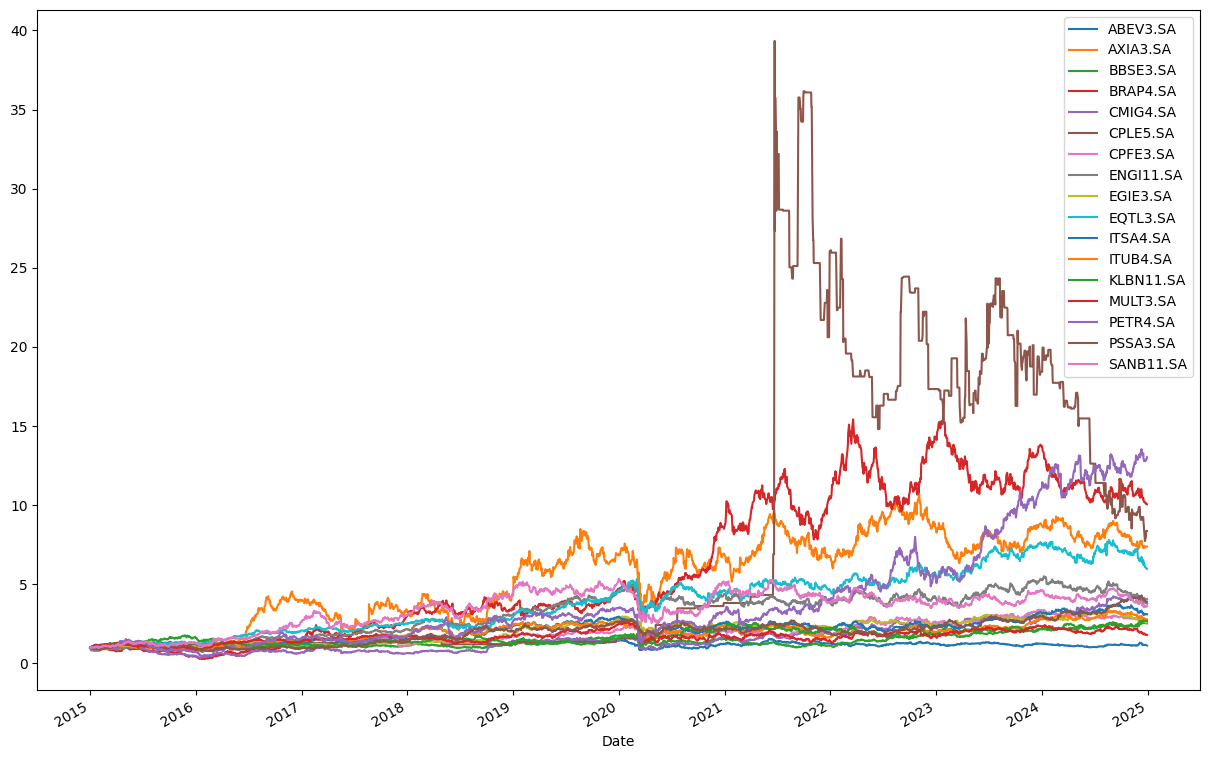

In [146]:
# Ploto os preços diários normalizados
wallet_norm.plot(figsize=(15,10))

## Calculo a volatilidade dos ultimos 10 anos

In [133]:
# Obtenho o retorno diário
retornos_diarios= retornoDiario(wallet)
retornos_diarios.head().T

Date,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09
ABEV3.SA,-0.018102,0.038144,0.014085,0.060256,-0.002418
AXIA3.SA,-0.019434,0.009009,0.035714,-0.018965,-0.021090
BBSE3.SA,-0.029983,0.042459,-0.015966,-0.002980,-0.032547
BRAP4.SA,-0.009573,0.044610,0.026335,0.014563,-0.020506
CMIG4.SA,-0.025781,-0.008821,0.000000,-0.008091,-0.035073
CPLE5.SA,0.000000,0.000000,0.000000,0.000000,0.000000
CPFE3.SA,-0.012950,0.018255,0.035294,0.020563,-0.054613
ENGI11.SA,-0.170909,0.000000,0.000000,0.000000,0.000000
EGIE3.SA,0.001227,0.020215,0.025217,0.010249,-0.076811
EQTL3.SA,-0.038182,0.056333,-0.008590,-0.007220,-0.054546


In [134]:
# Calculo a volatilidade dos ultimos 10 anos
volatilidades= {}
for ticker in retornos_diarios.columns:
    volatilidades[ticker]= volatilidadeUltimosNDias(retornos_diarios[ticker], len(retornos_diarios[ticker]))

In [135]:
volatilidades= pd.DataFrame(volatilidades, index=[0])
volatilidades.head().T

,0
ABEV3.SA,0.263232
AXIA3.SA,0.518688
BBSE3.SA,0.288750
BRAP4.SA,0.430050
CMIG4.SA,0.412754
CPLE5.SA,1.092520
CPFE3.SA,0.275771
ENGI11.SA,0.306166
EGIE3.SA,0.230472
EQTL3.SA,0.275576


In [136]:
# Obtenho o describe da tabela de volatilidade
volatilidades.T.describe()

,0
count,17.000000
mean,0.379970
std,0.199940
min,0.230472
25%,0.287936
50%,0.306166
75%,0.412754
max,1.092520


<Axes: >

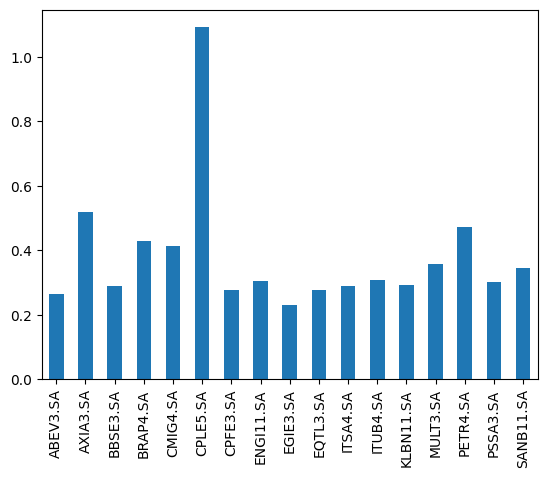

In [137]:
# Ploto a volatilidade dos ativos
volatilidades.T.plot(kind='bar', legend=False)

In [143]:
# Obtenho volatilidade menor 35%
volatilidade_min= volatilidades[volatilidades < 0.35]
volatilidade_min= volatilidade_min.dropna(axis=1)
volatilidade_min.head().T

,0
ABEV3.SA,0.263232
BBSE3.SA,0.288750
CPFE3.SA,0.275771
ENGI11.SA,0.306166
EGIE3.SA,0.230472
EQTL3.SA,0.275576
ITSA4.SA,0.287936
ITUB4.SA,0.309137
KLBN11.SA,0.292814
PSSA3.SA,0.302543


<Axes: >

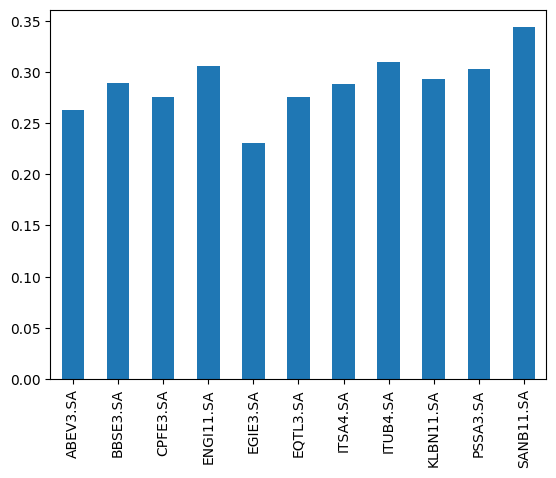

In [144]:
# Ploto a volatilidade dos ativos
volatilidade_min.T.plot(kind='bar', legend=False)

<Axes: xlabel='Date'>

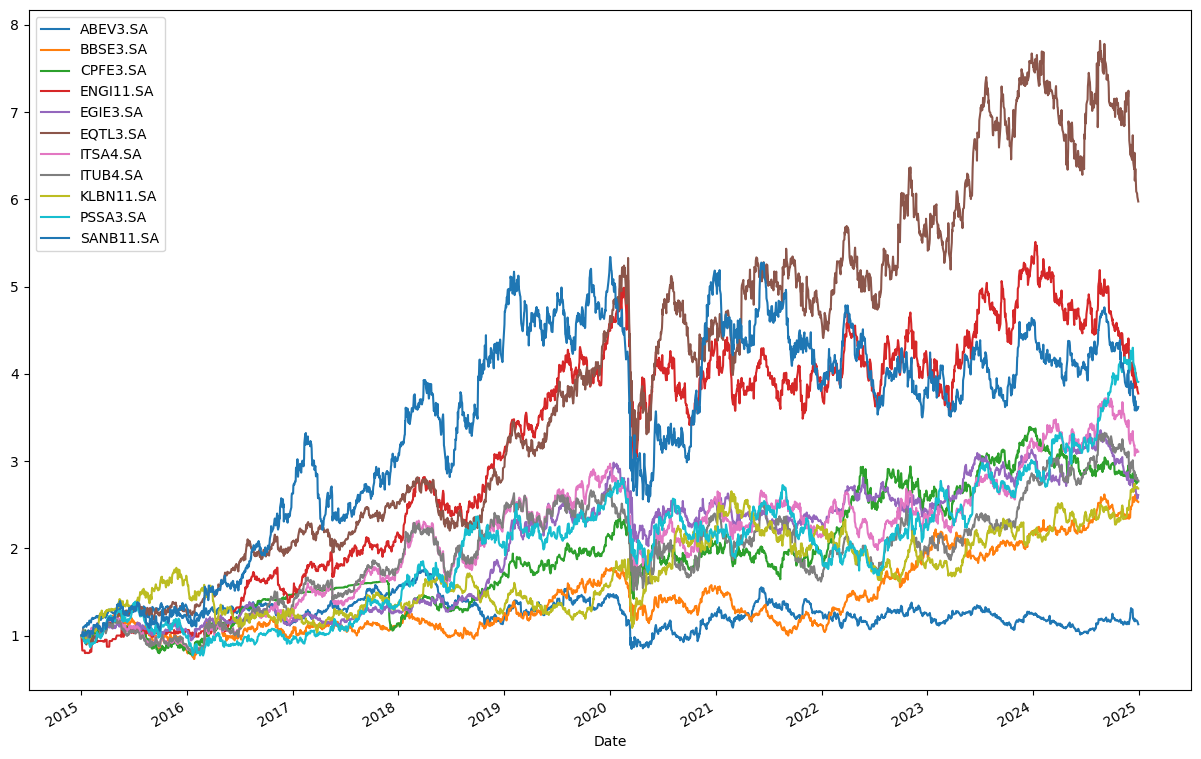

In [147]:
# Plot menor volatilidades
colunas= volatilidade_min.columns
wallet_norm[colunas].plot(figsize=(15,10))